In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mortgage_length = 25
annual_mortgage_rate = 0.05
mortgage_loan = 160000

In [3]:
# Derive the equivalent monthly mortgage rate from the annual rate
monthly_mortgage_rate = (1 + annual_mortgage_rate)**(1/12) - 1

mortgage_payment_periods = mortgage_length *12

In [4]:
monthly_mortgage_payment = -1*np.pmt(monthly_mortgage_rate, mortgage_payment_periods, mortgage_loan)

In [5]:
monthly_mortgage_payment

925.02110013146807

In [6]:
# Initialize variables
interest_paid = np.repeat(0.0, mortgage_payment_periods)
principal_paid = np.repeat(0.0, mortgage_payment_periods)
principal_remaining = np.repeat(0.0, mortgage_payment_periods)

# Loop through each mortgage payment period
for i in range(0, mortgage_payment_periods):
    
    # Handle the case for the first iteration
    if i == 0:
        previous_principal_remaining = mortgage_loan
    else:
        previous_principal_remaining = principal_remaining[i-1]
        
    # Calculate the interest based on the previous principal
    interest_payment = round(previous_principal_remaining*monthly_mortgage_rate, 2)
    principal_payment = round(monthly_mortgage_payment - interest_payment, 2)
    
    # Catch the case where all principal is paid off in the final period
    if previous_principal_remaining - principal_payment < 0:
        principal_payment = previous_principal_remaining
        
    # Collect the historical values
    interest_paid[i] = interest_payment
    principal_paid[i] = principal_payment
    principal_remaining[i] = previous_principal_remaining - principal_payment

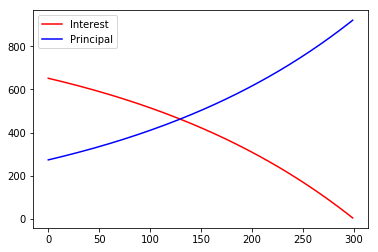

In [7]:
# Plot the interest vs principal for the mortgage payments per month
interest_plot = plt.plot(interest_paid, color="red")
principal_plot = plt.plot(principal_paid, color="blue")
plt.legend(['Interest', 'Principal'], loc=2)
plt.show()

In [ ]:
# This just looks at the change in the individual components of a constant mortgage payment

In [ ]:
# TODO:
# Look at equity in the house?
# model where it takes into account remortgaging, associated costs and varying interest rate